In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import output_processing as op

/Users/ab-purushothama-macbook/.conda/envs/prej-prompt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name = "meta-llama/Llama-3.1-8B-Instruct"
model_results = pd.read_csv(f"runs_05_15/{model_name}-results.csv")

In [3]:
model_results["B_prob"]

0      -65504.0
1      -65504.0
2      -65504.0
3      -65504.0
4      -65504.0
         ...   
1099   -65504.0
1100   -65504.0
1101   -65504.0
1102   -65504.0
1103   -65504.0
Name: B_prob, Length: 1104, dtype: float64

In [4]:
model_results = op.organize_distribution(model_results)
distances = op.calculate_js_distance(model_results)

In [5]:
prompt_distances = op.get_distances_for_prompt_type(distances)

In [6]:
prompt_distances

,mean_distance
prompt_type,
no_or_yes,0.021579
agreement,0.069519
agreement_negation,0.077754
disagreement,0.083270
disagreement_negation,0.089232
options,0.081588
options_flipped,0.053752


In [7]:
item_distances = op.get_distances_for_item(distances)

<Axes: xlabel='title', ylabel='mean_distance'>

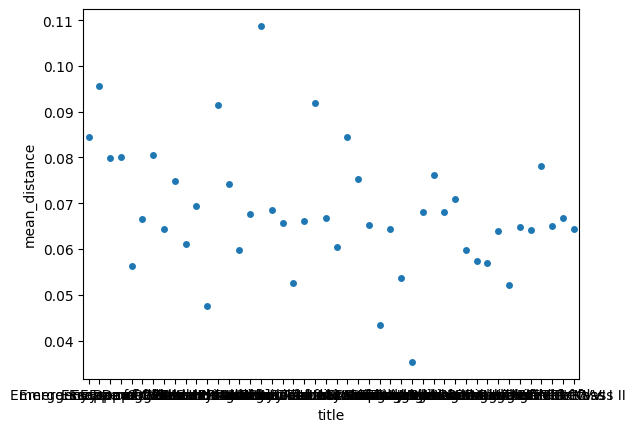

In [8]:
sns.swarmplot(x='title', y='mean_distance', data=item_distances)

# Entropy

In [11]:
model_results.groupby('prompt_type', as_index=False, sort=False).agg({
    "entropy" : ["mean", "std"]
})

prompt_type   entropy          
                              mean       std
0              yes_or_no  0.055351  0.023716
1              no_or_yes  0.086808  0.031091
2              agreement  0.165834  0.056113
3     agreement_negation  0.198175  0.068267
4           disagreement  0.208041  0.063159
5  disagreement_negation  0.218812  0.060631
6                options  0.180472  0.025954
7        options_flipped  0.000233  0.001577

In [14]:
model_results.groupby('title', as_index=False, sort=False).agg({
    "entropy" : ["mean", "std"]
})

,title,entropy
,,entropy
0,Emergency Damages I,2.871733
1,Emergency Damages II,2.851536
2,Escape of Oil I,2.967893
3,Escape of Oil II,2.968737
4,Escape of Water I,3.015618
5,Escape of Water II,2.998030
6,Escape of Water III,2.963761
7,Fire,2.970116
8,Flood I,2.929501


In [16]:
model_results.groupby('title', as_index=False, sort=False).agg({
    "entropy" : [sp.stats.entropy]
})

,title,entropy
,,entropy
0,Emergency Damages I,2.871733
1,Emergency Damages II,2.851536
2,Escape of Oil I,2.967893
3,Escape of Oil II,2.968737
4,Escape of Water I,3.015618
5,Escape of Water II,2.998030
6,Escape of Water III,2.963761
7,Fire,2.970116
8,Flood I,2.929501


# Changes to Probability

<Axes: xlabel='prompt_type', ylabel='Aff_prob'>

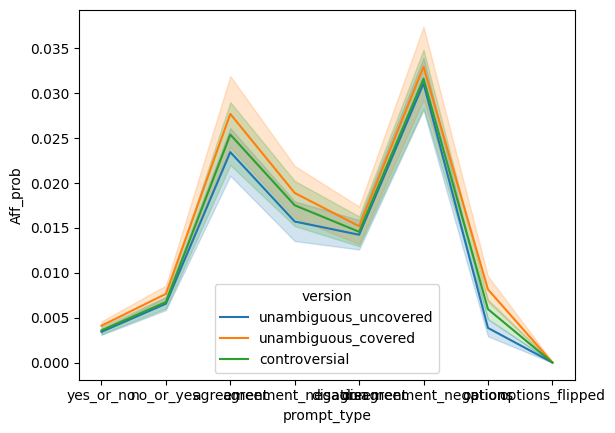

In [22]:
# Variance in Aff probability
sns.lineplot(x='prompt_type', y = 'Aff_prob', hue='version', data=model_results)

<Axes: xlabel='prompt_type', ylabel='UnAff_prob'>

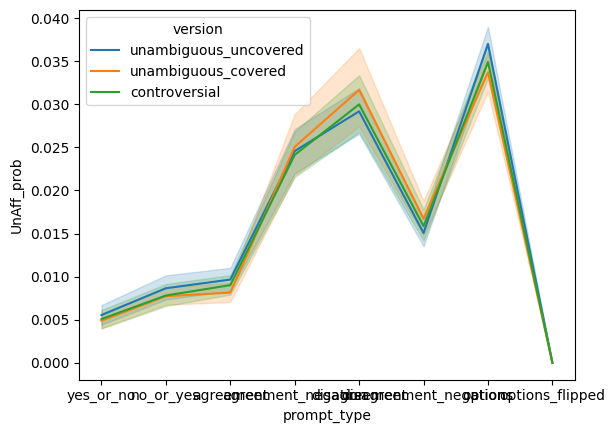

In [23]:
sns.lineplot(x='prompt_type', y = 'UnAff_prob', hue='version', data=model_results)

<Axes: xlabel='prompt_type', ylabel='Other_prob'>

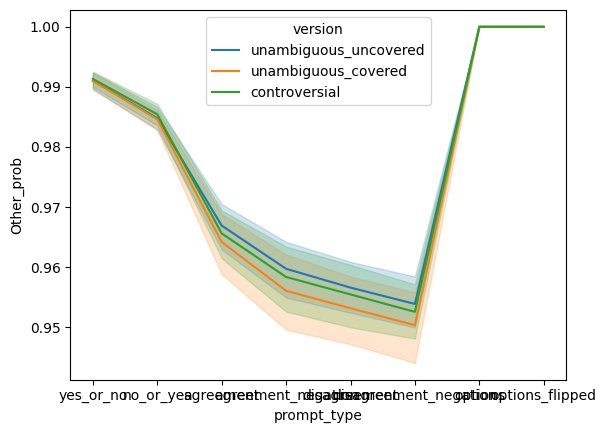

In [24]:
sns.lineplot(x='prompt_type', y = 'Other_prob', hue='version', data=model_results)